<a href="https://colab.research.google.com/github/iljimae13/UTS/blob/main/SoalUTSGanjilA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengolahan Citra Digital
NPM  : 2006043 <br>
NAMA : Ade Iskandar Zulkarnaen



## Import library

In [159]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

Keterangan <br>
Keseluruhan modul dapat dipanggil menggunakan perintah `import <module>` atau dapat juga dipanggil hanya fungsi tertentu pada satu modul menggunakan perintah `from <module> import <fungsi>`. 

Pada Pengolahan Citra Digital ini digunakan beberapa modul Python untuk keperluan pengolahan citra antara lain :

*   **OpenCV**  yang berfungsi untuk mengolah citra digital dengan fungsi Computer Vision. OpenCV dapat dipanggil pada Google Colab menggunakan perintah `import cv2`. Khusus untuk penggunaan OpenCV di Google Colab, terdapat satu fungsi yang memerlukan patch atau perbaikan, yaitu `cv2.imshow()`. Fungsi ini digunakan untuk menampilkan gambar pada OpenCV. Di Google Colab, fungsi ini digantikan dengan baris perintah `from google.colab.patches import cv2_imshow` selanjutnya fungsi cv2.imshow() digantikan dengan fungsi cv2_imshow().



*   **Matplotlib** merupakan modul Python yang digunakan untuk keperluan mencetak keluaran pada layar: grafik, plot, gambar, dan lain sebagainya
*   **Numpy** merupakan modul Python yang berfungsi untuk menangani berbagai operasi Matriks. Dalam pengolahan citra digital, sebuah gambar atau foto dapat dianggap sebagai sebuah matriks. oleh karenanya, Numpy dapat membantu beberapa fungsi yang digunakan pada saat pengolahan citra.

## upload gambar

untuk mengupload gambar secara manual kita bisa menggunakan perintah `file.upload()` yang tersedia pada modul google colab.

In [160]:
from google.colab import files  # import modul files
files = files.upload()          # mengupload gambar

Saving mangAde.jpg to mangAde.jpg


In [161]:
img = cv.imread("mangAde.jpg")

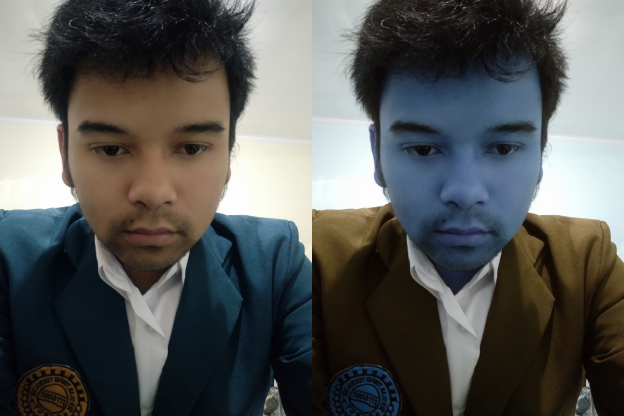

In [162]:
# menurunkn skala gambar sampai dengan 10%
scale_percent = 10 / 100 ; 
width = int(img.shape[1] * scale_percent)
height = int(img.shape[0] * scale_percent)
dim = (width, height)

image = cv.resize(img, dim, interpolation = cv.INTER_AREA);
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)


final_frame = cv.hconcat((image, image_2))
cv2_imshow(final_frame)

## mengakses properti gambar

**cv2.resize( )** <br>
Berfungi untuk mengubah dimensi gambar. Pada fungsi yang saya buat saya menurunkan sekala gambar samapi 25% . Dapat dilihat dimensi gambar sebelum dan sesudah skala gambar di *resize*. 
Beberapa perintah lain yang dapat digunakan untuk mengakses properti citra ```image``` adalah:

In [163]:
print('======[ Gambar Sebelum Resize ]======')
print(img.size)   # menampilkan resolusi ( total pixel )
print(img.shape)  # menampilkan ukuran data pada media penyimpan
print(img.dtype)  # image datatype (kedalaman bit) 

print('\n======[ Gambar Sesudah di Resize ]======')
print(image.size)   # menampilkan resolusi ( total pixel )
print(image.shape)  # menampilkan ukuran data pada media penyimpan
print(image.dtype)  # image datatype (kedalaman bit) 


======[ Gambar Sebelum Resize ]======
38937600
(4160, 3120, 3)
uint8

======[ Gambar Sesudah di Resize ]======
389376
(416, 312, 3)
uint8


## menampilkan histogram citra

Histogram dapat ditampilkan dengan menggunakan banyak cara. Fungsi yang dapat digunakan antara lain :

*   ```plt.hist()``` tersedia pada modul `Matplotlib`
*   ```cv2.calcHist()``` tersedia pada modul `cv2`
*   ```np.histogram()``` tersedia pada modul `numpy`

Berikut adalah contoh kode untuk memanggil histogram:

[[ 1  2  2  2 10]
 [10 20 30 40 50]]
[ 1  2  2  2 10 10 20 30 40 50]
[ 1  2  2  2 10 10 20 30 40 50]


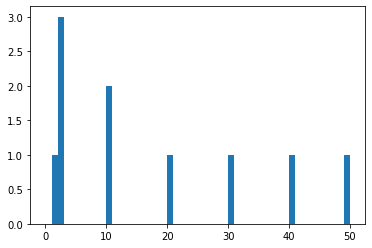

In [165]:
a = np.array([[1,2,2,2,10],[10,20,30,40,50]])
print(a)
print(a.ravel())   
# ravel() adalah fungsi numpy untuk mengkonversi array menjadi flat array
print(a.flatten())

plt.hist(a.ravel(), bins = 50, range = [0, 50])
plt.show()

### fungsi plt.hist( )

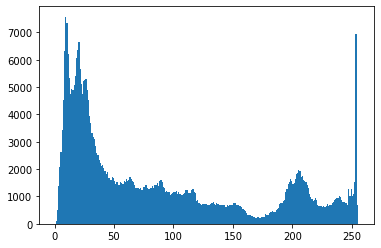

In [166]:
plt.hist(image.ravel(), bins = 256, range = [0,256])
plt.show()

### fungsi cv2.calHist()
Adapun parameter untuk fungsi cv2.calcHist() adalah sebagai berikut:

```cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```

* images : gambar yang dibaca menggunakan fungsi cv.read dengan type uint8 or float32. Gambar ini harus dinyatakan sebagai sebuah array dengan kurung siku "[img]".
* channels : band yang akan dihitung histogramnya. Gunakan [0] untuk citra *grayscale*. Untuk citra berwarna, kita dapat berikan nilai [0], [1] atau [2] untuk menghitung histogram dari masing-masing band.
* mask : digunakan apabila kita ingin memperoleh histogram dari sebagian citra saja. 
* histSize : Ukuran histogram, atau banyaknya kolom yang digambar. Kita dapat gunakan nilai sesuai dengan jumlah pixel [256].
* ranges : rentang nilai. Pada citra 8 bit, nilainya adalah [0,256].

#### histogram dengan jumlah pixel [256]

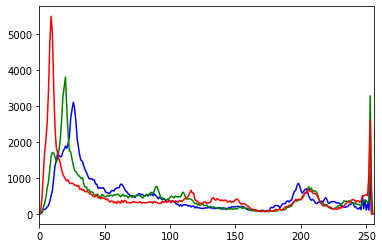

In [167]:
color = ('b','g','r')
for i,col in enumerate(color):
  histogram = cv.calcHist([image], [i], None, [256], [0,256])
  plt.plot(histogram, color = col)
  plt.xlim([0,256])
plt.show()

#### histogram dengan jumlah pixel [ 4 ]

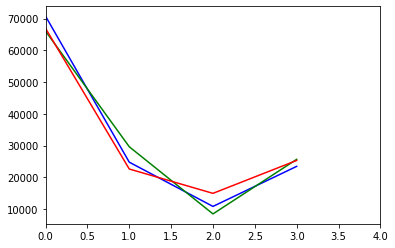

In [168]:
color = ('b','g','r')
for i,col in enumerate(color):
  histogr = cv.calcHist([image], [i], None, [4], [0,256])
  plt.plot(histogr, color = col)
  plt.xlim([0,4])
plt.show()

#### histogram dengan jumlah pixel [ 8 ]

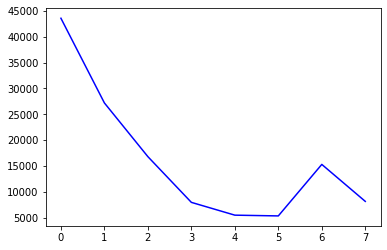

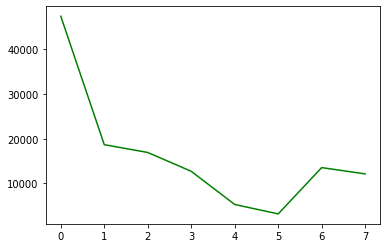

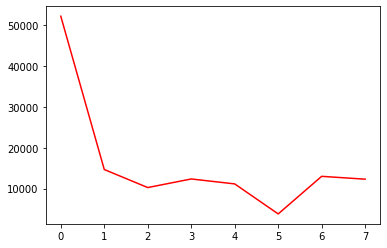

In [169]:
color = ('b','g','r')
for i,col in enumerate(color):
  histogr = cv.calcHist([image], [i], None, [8], [0,256])
  plt.plot(histogr, color = col)
  plt.show()

#### histogram dengan jumlah pixel [ 16 ]

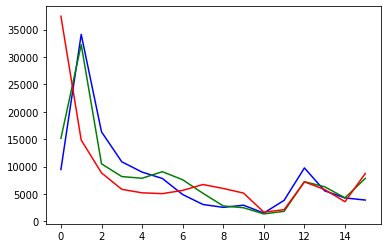

In [170]:
color = ('b','g','r')
for i,col in enumerate(color):
  histogr = cv.calcHist([image], [i], None, [16], [0,256])
  plt.plot(histogr, color = col)
plt.show()

#### histogram dengan jumlah pixel [ 32 ]

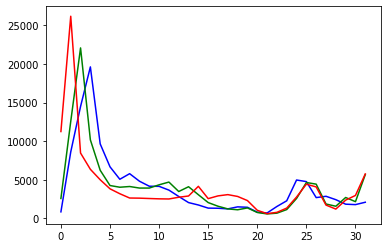

In [172]:
color = ('b','g','r')
for i,col in enumerate(color):
  histogr = cv.calcHist([image], [i], None, [32], [0,256])
  plt.plot(histogr, color = col)
plt.show()

## Ekstraksi Band
Sebuah citra dapat dipecah pada band penyusunnya dengan menggunakan perintah `cv2.split()`.

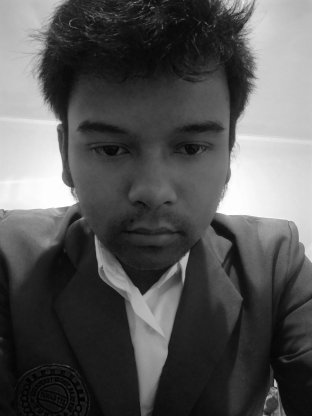

In [210]:
# Band blue, green dan red masng-masing disimpan pada variabel b,g,r
b,g,r = cv.split(image)
cv2_imshow(b)

atau bisa juga dengan menggunakan operasi index pada matriks img 


*   `b = img[...,0]`  # blue channel
*   `g = img[...,1]`  # green channel
*   `r = img[...,2]`  # red channel

### blue Channel

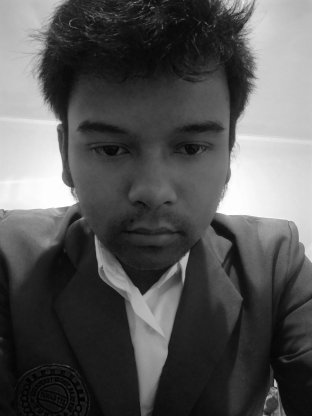

In [211]:
#blue channel
bluech = image[:,:,0]
cv2_imshow(bluech)

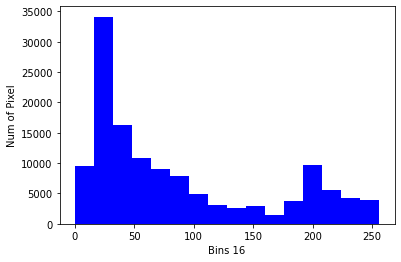

In [212]:
plt.hist(bluech.ravel(), 16, [0, 256], color='blue')
plt.xlabel('Bins 16')
plt.ylabel('Num of Pixel')
plt.show()

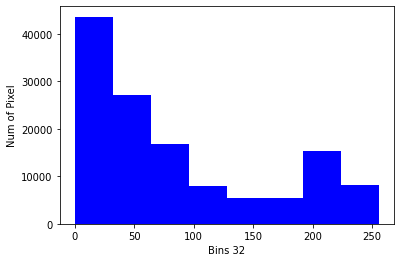

In [213]:
plt.hist(bluech.ravel(), 8, [0, 256], color='blue')
plt.xlabel('Bins 32')
plt.ylabel('Num of Pixel')
plt.show()

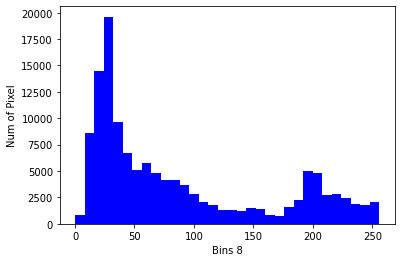

In [214]:
plt.hist(bluech.ravel(), 32, [0, 256], color='blue')
plt.xlabel('Bins 8')
plt.ylabel('Num of Pixel')
plt.show()

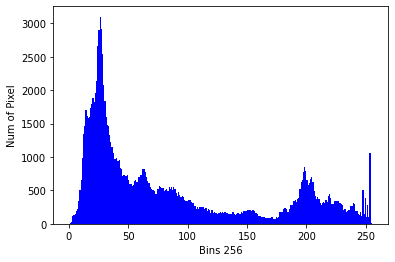

In [215]:
plt.hist(bluech.ravel(), 256, [0, 256], color='blue')
plt.xlabel('Bins 256')
plt.ylabel('Num of Pixel')
plt.show()

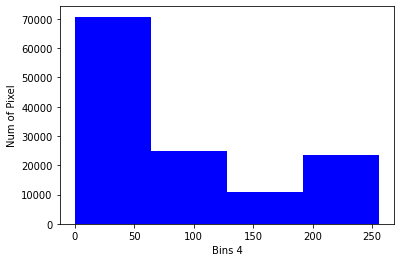

In [216]:
plt.hist(bluech.ravel(), 4, [0, 256], color='blue')
plt.xlabel('Bins 4')
plt.ylabel('Num of Pixel')
plt.show()

### green channel

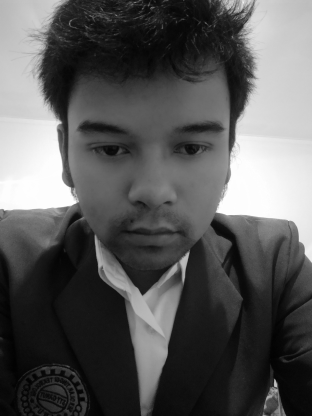

In [217]:
#green channel
greench = image[:,:,1]
cv2_imshow(greench)

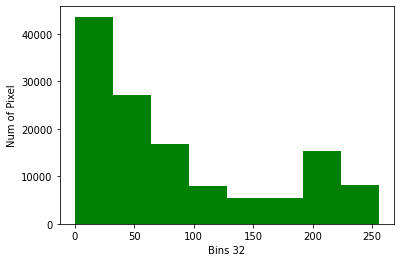

In [218]:
plt.hist(bluech.ravel(), 8, [0, 256], color='green')
plt.xlabel('Bins 32')
plt.ylabel('Num of Pixel')
plt.show()

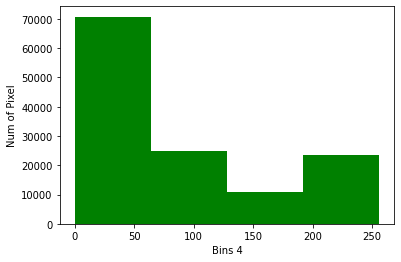

In [219]:
plt.hist(bluech.ravel(), 4, [0, 256], color='green')
plt.xlabel('Bins 4')
plt.ylabel('Num of Pixel')
plt.show()

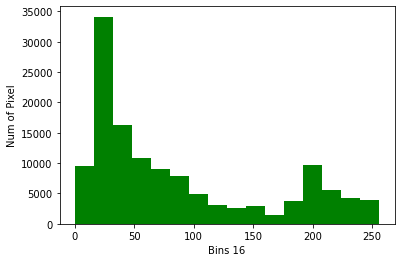

In [220]:
plt.hist(bluech.ravel(), 16, [0, 256], color='green')
plt.xlabel('Bins 16')
plt.ylabel('Num of Pixel')
plt.show()

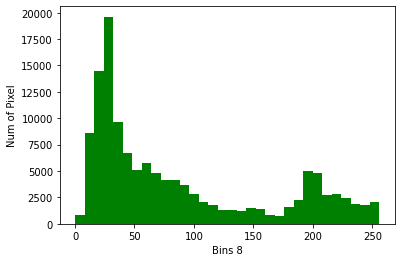

In [221]:
plt.hist(bluech.ravel(), 32, [0, 256], color='green')
plt.xlabel('Bins 8')
plt.ylabel('Num of Pixel')
plt.show()

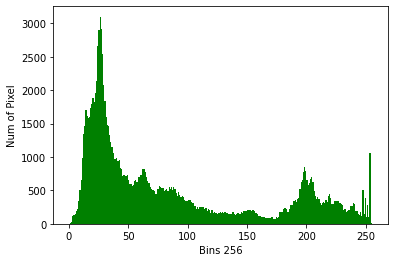

In [222]:
plt.hist(bluech.ravel(), 256, [0, 256], color='green')
plt.xlabel('Bins 256')
plt.ylabel('Num of Pixel')
plt.show()

### red channel

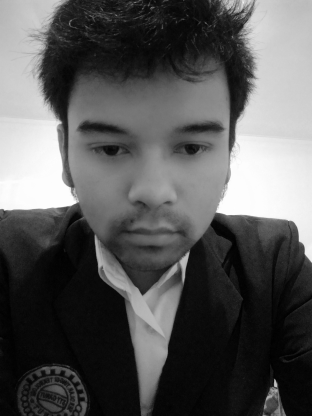

In [223]:
#red channel

redch = image[:,:,2]
cv2_imshow(redch)

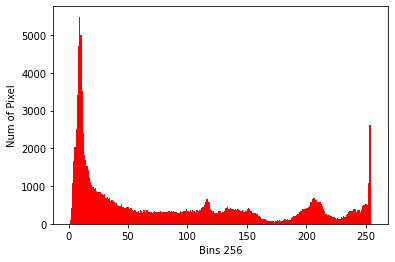

In [224]:
plt.hist(redch.ravel(), 256, [0, 256], color='red')
plt.xlabel('Bins 256')
plt.ylabel('Num of Pixel')
plt.show()

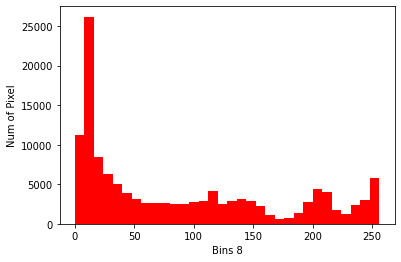

In [225]:
plt.hist(redch.ravel(), 32, [0, 256], color='red')
plt.xlabel('Bins 8')
plt.ylabel('Num of Pixel')
plt.show()

Text(0, 0.5, 'Num of Pixel')

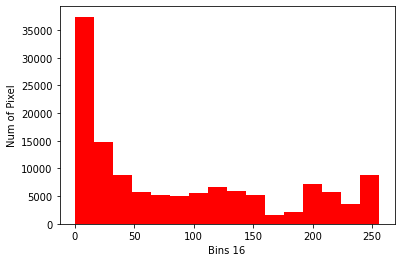

In [226]:
plt.hist(redch.ravel(), 16, [0, 256], color='red')
plt.xlabel('Bins 16')
plt.ylabel('Num of Pixel')

Text(0, 0.5, 'Num of Pixel')

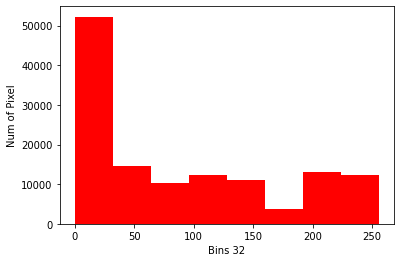

In [227]:
plt.hist(redch.ravel(), 8, [0, 256], color='red')
plt.xlabel('Bins 32')
plt.ylabel('Num of Pixel')

Text(0, 0.5, 'Num of Pixel')

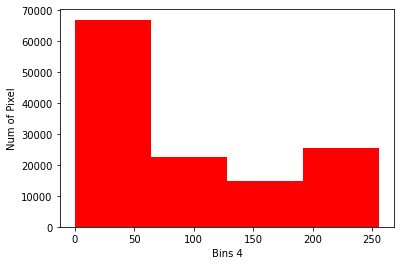

In [228]:
plt.hist(redch.ravel(), 4, [0, 256], color='red')
plt.xlabel('Bins 4')
plt.ylabel('Num of Pixel')

## Transformasi Colorspace

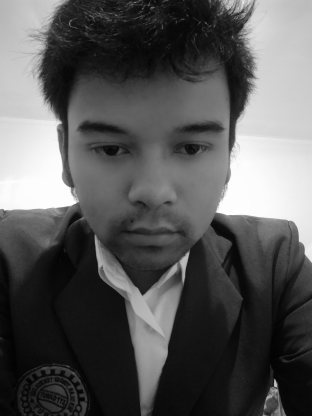

In [201]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

Fungsi di atas mentransformasi citra 'image' ke dalam kelas gray scale

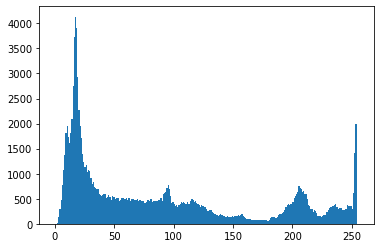

129792
(416, 312)
uint8


In [202]:
plt.hist(gray_image.ravel(), bins = 256, range = [0,256])
plt.show()


print(gray_image.size)
print(gray_image.shape)
print(gray_image.dtype)

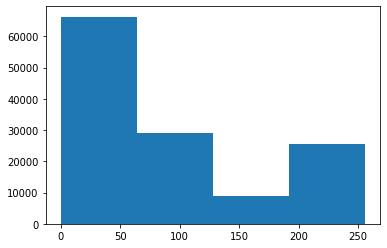

129792
(416, 312)
uint8


In [203]:
plt.hist(gray_image.ravel(), bins = 4, range = [0,256])
plt.show()


print(gray_image.size)
print(gray_image.shape)
print(gray_image.dtype)

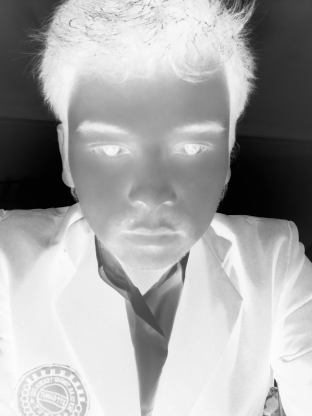

In [204]:
invert_gray = 255 - gray_image
cv2_imshow(invert_gray)

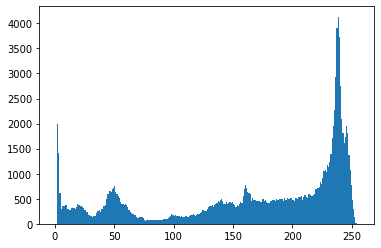

In [205]:
plt.hist(invert_gray.ravel(), bins = 256, range = [0,256])
plt.show()

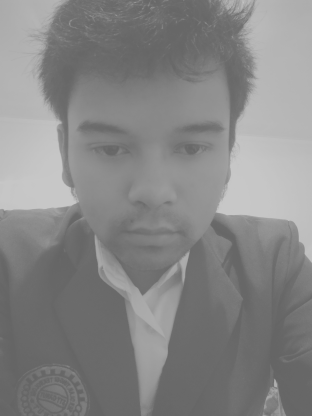

In [206]:
bright_image = (100.0/255)*gray_image + 100
cv2_imshow(bright_image)

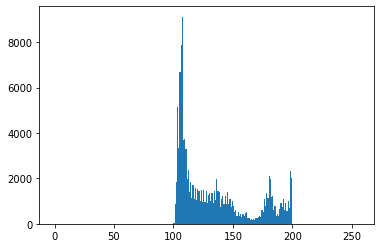

In [207]:
plt.hist(bright_image.ravel(), bins = 256, range = [0,256])
plt.show()

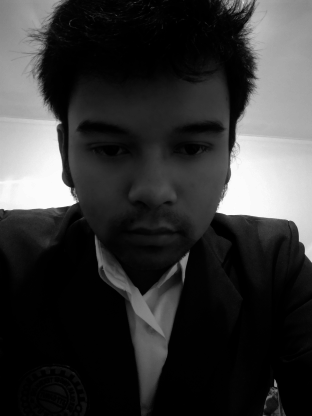

In [208]:
darken_image = 255.0*(gray_image/255.0)**2
cv2_imshow(darken_image)

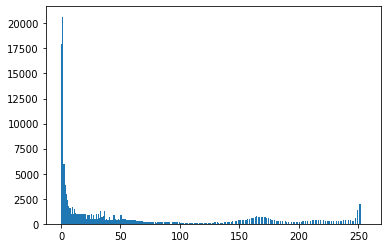

In [209]:
plt.hist(darken_image.ravel(), bins = 256, range = [0,256])
plt.show()

# Kesimpulan

program ini berisi tentang program pengenalan computer vision. program program yang dibuat seperti pembuatan *image histogram*, *ekstraksi band* dan *iransformasi colorspace*

Ada beberapa Library yang bisa digunaka untuk melakukan pengolahan Citra digital dalam bahasa pemrograma python antara lain : 

*   libray openCV `cv2` untuk pengolahan gambar.
*   library `matplotlib` untuk pembuatan plot.
*   library `numpy` untuk pengolahan array.

Berdasarkan plot histogram, gamabar original yang saya uploaddapat disimpulkan bahwa foto saya tergolong dalam gambar **under expose**.
